In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sci378 import *

Version 0.0.2


## one example

In [3]:
data=pd.read_csv('data/linear_data.csv')
data

,Unnamed: 0,x,y
0,0,-5.000000,-12.396990
1,1,-4.655172,-26.185267
2,2,-4.310345,-12.784231
3,3,-3.965517,-6.186905
4,4,-3.620690,-21.905844
5,5,-3.275862,-7.680495
6,6,-2.931034,-19.538526
7,7,-2.586207,-10.300072
8,8,-2.241379,-14.347338
9,9,-1.896552,-9.344688


In [4]:
x=array(data['x'])
y=array(data['y'])
x,y

(array([-5.        , -4.65517241, -4.31034483, -3.96551724, -3.62068966,
        -3.27586207, -2.93103448, -2.5862069 , -2.24137931, -1.89655172,
        -1.55172414, -1.20689655, -0.86206897, -0.51724138, -0.17241379,
         0.17241379,  0.51724138,  0.86206897,  1.20689655,  1.55172414,
         1.89655172,  2.24137931,  2.5862069 ,  2.93103448,  3.27586207,
         3.62068966,  3.96551724,  4.31034483,  4.65517241,  5.        ]),
 array([-12.39698987, -26.1852668 , -12.78423125,  -6.18690469,
        -21.90584415,  -7.6804948 , -19.53852568, -10.30007218,
        -14.34733773,  -9.34468752,  -0.05057071,  -2.79116003,
         -9.87559924,   2.52749643,  -7.51648143,  -6.352439  ,
          2.98929743,  -0.39693121,   4.15207067,  13.19929235,
          1.6593172 ,   3.97302711,  10.50702803,   6.9256665 ,
         10.84885606,   2.67422235,   4.62772486,  13.95807979,
         14.77337995,  12.1113369 ]))

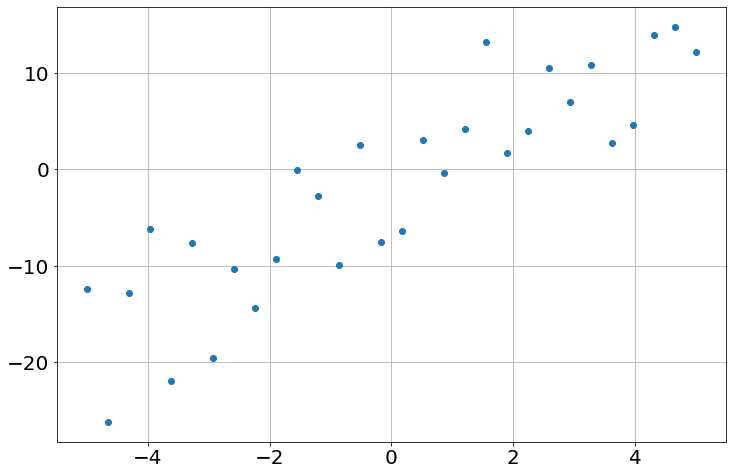

In [5]:
plot(x,y,'o')

In [6]:
from sie.mcmc import MCMCModel,Uniform,Normal,Jeffreys

In [7]:
def P_data(data,m,b,σ):
    x,y=data
    μ=m*x+b
    distribution=Normal(μ,σ)
    return sum(distribution(y))

In [8]:
data=x,y
model=MCMCModel(data,P_data,
                m=Normal(0,10),
                b=Uniform(-10,10),
                σ=Jeffreys(),
               )

Sampling Prior...
Done.
0.71 s
Running MCMC...
Done.
2.51 s
Running MCMC...
Done.
2.45 s
figsize [10.0, 18.75]


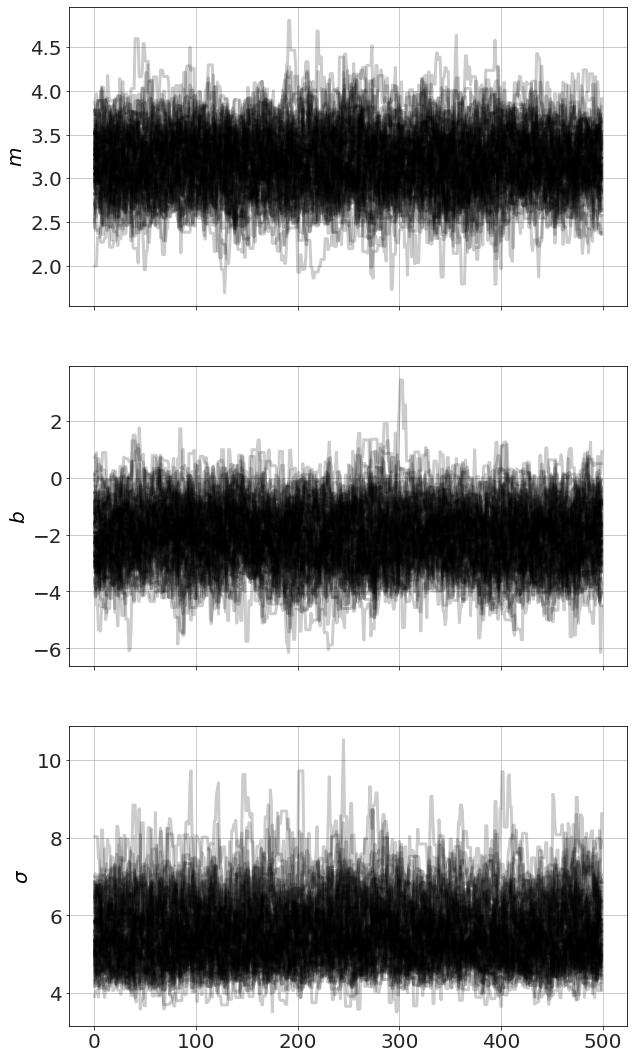

In [9]:
for i in range(2):
    model.run_mcmc(500)
model.plot_chains()

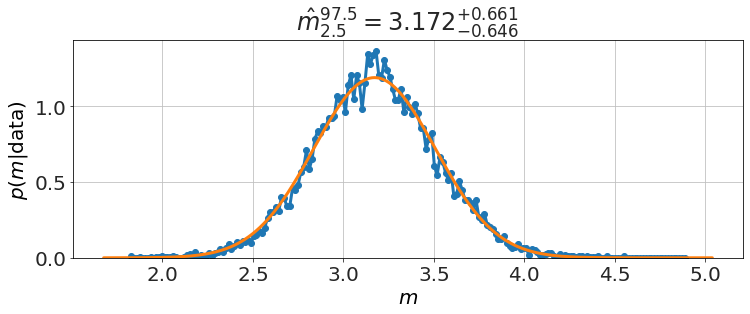

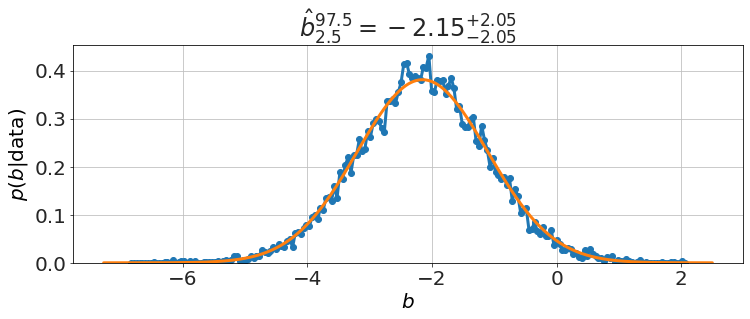

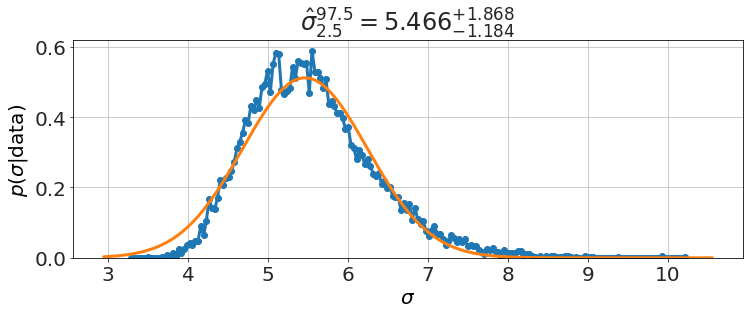

In [17]:
model.plot_distributions()

In [11]:
data=pd.read_csv('data/linear_data.csv')
model=ols('y ~ x', data=data)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     94.34
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           1.82e-10
Time:                        13:41:18   Log-Likelihood:                -91.932
No. Observations:                  30   AIC:                             187.9
Df Residuals:                      28   BIC:                             190.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0909      0.980     -2.134      0.042      -4.097      -0.084
x              3.1878      0.328      9.713      0.000       2.516       3.860
==============================================================================
Omnibus:                        1.677   Durbin-Watson:                   2.590
Prob(Omnibus):                  0.432   Jarque-Bera (JB):                1.043
Skew:                          -0.018   Prob(JB):                        0.594
Kurtosis:                       2.087   Cond. No.                         2.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

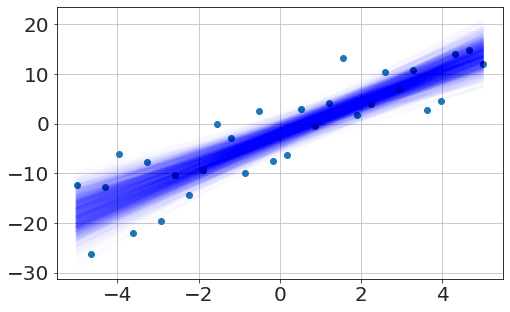

In [21]:
figure(figsize=(8,5))
plot(data['x'],data['y'],'o')

for result in ols_result_random_samples(results):
    xx=linspace(-5,5,20)
    yy=result.predict({'x':xx})
    plot(xx,yy,'b-',alpha=0.01)

## another example

In [22]:
data=pd.read_csv('data/temperature.txt',delim_whitespace=True)
data

,Year,Annual_Mean,5-year_Mean
0,1882,-0.08,-0.16
1,1883,-0.19,-0.19
2,1884,-0.26,-0.22
3,1885,-0.30,-0.27
4,1886,-0.29,-0.27
...,...,...,...
129,2011,0.60,0.65
130,2012,0.63,0.67
131,2013,0.65,0.70
132,2014,0.74,*


In [23]:
offset=1900
data['Year_Offset']=data['Year']-offset
model=ols('Annual_Mean ~ Year_Offset', data=data)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Annual_Mean   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     408.1
Date:                Wed, 04 Mar 2020   Prob (F-statistic):           3.29e-42
Time:                        09:52:32   Log-Likelihood:                 59.766
No. Observations:                 134   AIC:                            -115.5
Df Residuals:                     132   BIC:                            -109.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.3159      0.022    -14.609      0.000      -0.359      -0.273
Year_Offset     0.0070      0.000     20.201      0.000       0.006       0.008
==============================================================================
Omnibus:                        5.219   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                2.953
Skew:                           0.129   Prob(JB):                        0.228
Kurtosis:                       2.320   Cond. No.                         99.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

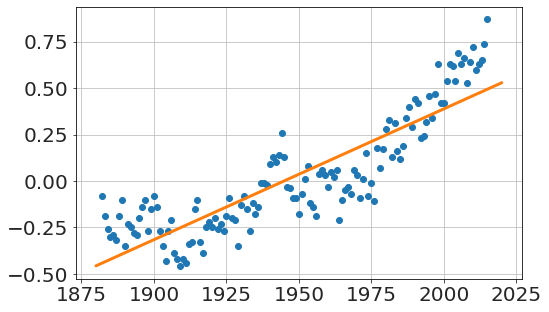

In [24]:
figure(figsize=(8,5))
plot(data['Year'],data['Annual_Mean'],'o')

xx=linspace(1880,2020,20)
yy=results.predict({'Year_Offset':xx-offset})
plot(xx,yy,'-')

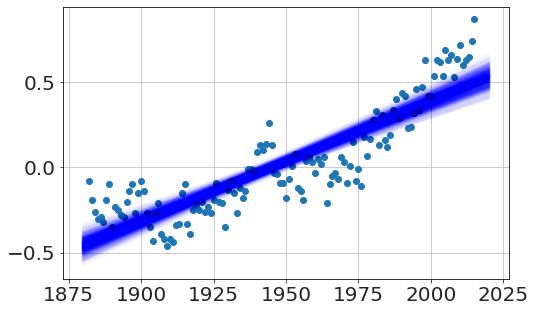

In [25]:
figure(figsize=(8,5))
plot(data['Year'],data['Annual_Mean'],'o')

for result in ols_result_random_samples(results):
    xx=linspace(1880,2020,20)
    yy=result.predict({'Year_Offset':xx-offset})
    plot(xx,yy,'b-',alpha=0.01)